In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ushape.csv",header=None)
# df=pd.read_csv("ushape.csv",header=None,names=['X','Y','class'])

In [3]:
df=df.round(4)  # round of four place 
df.columns = ['X', 'Y', 'class']


In [4]:
df.head(5)

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1151,-0.0462,1.0
2,0.8825,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8295,-0.5393,1.0


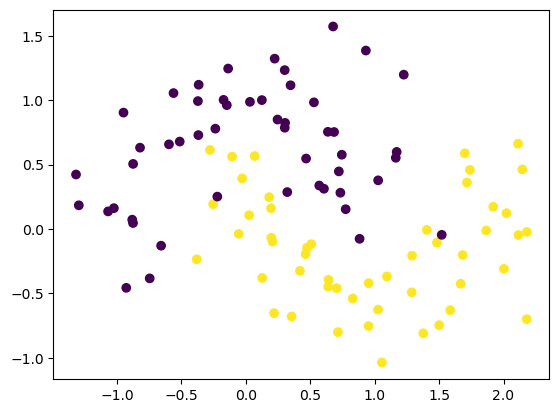

In [5]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\rosha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
#set parameter to 0
model.get_weights()

[array([[-0.22882062, -0.7527042 ],
        [ 0.8340663 ,  1.1087664 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.0414449],
        [-1.112023 ]], dtype=float32),
 array([0.], dtype=float32)]

In [12]:
initial_weights = model.get_weights()

In [13]:
model.set_weights(initial_weights)

In [14]:
model.get_weights()

[array([[-0.22882062, -0.7527042 ],
        [ 0.8340663 ,  1.1087664 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.0414449],
        [-1.112023 ]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.5000 - loss: 0.6450 - val_accuracy: 0.5000 - val_loss: 0.6264
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.6444 - val_accuracy: 0.5000 - val_loss: 0.6260
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.6440 - val_accuracy: 0.5000 - val_loss: 0.6254
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5000 - loss: 0.6435 - val_accuracy: 0.5000 - val_loss: 0.6249
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 0.6430 - val_accuracy: 0.5000 - val_loss: 0.6243
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5000 - loss: 0.6425 - val_accuracy: 0.5000 - val_loss: 0.6237
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 0.6420 - val_accuracy: 0.5000 - val_loss: 0.6231
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5000 - loss: 0.6414 - val_accuracy: 0.5000 - val_loss:

In [17]:
model.get_weights()

[array([[ 0.12436347, -0.98501575],
        [ 0.45271784,  1.3992577 ]], dtype=float32),
 array([ 0.28647187, -0.13097988], dtype=float32),
 array([[ 0.1722297],
        [-1.3035518]], dtype=float32),
 array([0.20176692], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 566us/step


<Axes: >

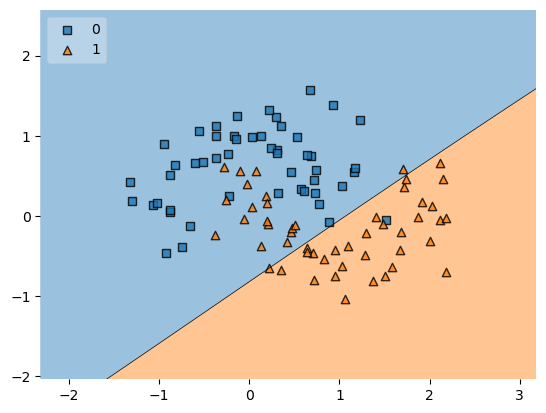

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)